# CoinMarketCap API Automation

#### Creating a function to automatically request the data using an API every 60 seconds. Then cleaning and visualizing the data.

In [1]:
# Import libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Connect to API and request data

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4a658f2a-cf06-4b63-8d74-b75dbc49e2d1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print('Success')
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

Success


In [2]:
# Check the data's type

type(data)

dict

In [3]:
# Import pandas 

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Normalize the json data and add time

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9815,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.919704e+07,1.919704e+07,NaN,1,NaN,NaN,None,2022-11-03T10:34:00.000Z,20293.956779,2.241256e+11,486.6086,-0.063409,-0.548298,-1.454661,1.604674,2.541929,-12.460280,3.895840e+11,38.5616,4.261731e+11,None,2022-11-03T10:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 10:36:08.682031
1,1027,Ethereum,ETH,ethereum,6169,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-11-03T10:34:00.000Z,1547.417255,1.305658e+11,789.0028,-0.163228,0.059701,-0.028847,14.659965,-0.534284,-7.029298,1.893634e+11,18.7435,1.893634e+11,None,2022-11-03T10:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 10:36:08.682031
2,825,Tether,USDT,tether,41504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.935034e+10,7.214177e+10,NaN,3,NaN,NaN,None,2022-11-03T10:34:00.000Z,1.000013,7.664570e+10,38.1275,0.002574,0.002284,-0.010003,-0.013210,0.000970,-0.012171,6.935121e+10,6.8645,7.214267e+10,None,2022-11-03T10:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-03 10:36:08.682031
3,1839,BNB,BNB,bnb,1133,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599776e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-11-03T10:34:00.000Z,333.568815,1.638737e+09,40.4484,-0.655700,4.626910,15.823933,14.441515,19.938390,4.297686,5.336355e+10,5.2817,6.671376e+10,None,2022-11-03T10:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 10:36:08.682031
4,3408,USD Coin,USDC,usd-coin,6654,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.259879e+10,4.259879e+10,NaN,5,NaN,NaN,None,2022-11-03T10:34:00.000Z,1.000124,5.706592e+09,78.3291,-0.000825,0.000612,0.022633,0.013989,-0.001901,0.011396,4.260409e+10,4.2170,4.260409e+10,None,2022-11-03T10:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-03 10:36:08.682031


In [5]:
# Create function

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4a658f2a-cf06-4b63-8d74-b75dbc49e2d1',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\User\CoinMarketCapAPI.csv'):
        df.to_csv(r'C:\Users\User\CoinMarketCapAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\User\CoinMarketCapAPI.csv', mode='a', header=False)
        

### Automated process

In [6]:
# Import additional libraries

import os
from time import time
from time import sleep

In [7]:
# Automate the process by calling function every minute

for i in range(333):
    api_runner()
    print('Api_runner completed')
    sleep(60) # Will run every 60 seconds
exit()
    

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Api_runner completed


C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Api_runner completed


KeyboardInterrupt: 

In [8]:
# Confirm CSV file was created and is working

df72 = pd.read_csv(r'C:\Users\User\CoinMarketCapAPI.csv')
df72.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9814,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.919699e+07,1.919699e+07,NaN,1,NaN,NaN,NaN,2022-11-03T08:40:00.000Z,20302.073234,5.553915e+10,44.5583,-0.009423,-0.699675,-2.041503,1.818467,2.983080,-12.265126,3.897388e+11,38.6184,4.263435e+11,NaN,2022-11-03T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 08:42:27.159088
1,1,1027,Ethereum,ETH,ethereum,6168,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-11-03T08:40:00.000Z,1543.347039,2.378760e+10,63.1104,-0.192382,-1.480178,-0.825406,14.386599,-0.505751,-6.863944,1.888653e+11,18.7143,1.888653e+11,NaN,2022-11-03T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 08:42:27.159088
2,2,825,Tether,USDT,tether,41499,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.935034e+10,7.214177e+10,NaN,3,NaN,NaN,NaN,2022-11-03T08:40:00.000Z,0.999972,7.833368e+10,41.7892,-0.003416,0.006365,-0.021810,-0.018322,-0.001969,-0.015957,6.934837e+10,6.8680,7.213972e+10,NaN,2022-11-03T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-03 08:42:27.159088
3,3,1839,BNB,BNB,bnb,1133,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.599777e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-11-03T08:40:00.000Z,336.761362,1.647834e+09,41.2555,0.124805,4.725634,15.957110,15.742836,21.530495,6.054428,5.387430e+10,5.3386,6.735227e+10,NaN,2022-11-03T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 08:42:27.159088
4,4,3408,USD Coin,USDC,usd-coin,6654,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.253822e+10,4.253822e+10,NaN,5,NaN,NaN,NaN,2022-11-03T08:40:00.000Z,1.000017,5.979795e+09,83.1892,-0.004489,-0.004085,0.011041,0.011329,-0.011698,0.003308,4.253892e+10,4.2151,4.253892e+10,NaN,2022-11-03T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-03 08:42:27.159088


### Data Cleaning

In [9]:
# Using groupby to organize the data in df72

df72_grouped = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df72_grouped.head()


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.026271,-0.677312,-1.642212,1.942424,2.666723,-12.328720
Ethereum,0.257332,-0.819129,-0.041494,14.962273,-0.361043,-6.755903
Tether,-0.001145,0.006383,-0.019085,-0.017582,-0.001533,-0.013411
BNB,-0.312793,4.879875,16.316536,15.402456,20.886925,5.067641
USD Coin,0.002163,0.005126,0.021663,0.010376,-0.001499,0.007482


In [11]:
# Transform grouped dataframe into series

df4 = df72_grouped.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     0.026271
         quote.USD.percent_change_24h   -0.677312
         quote.USD.percent_change_7d    -1.642212
         quote.USD.percent_change_30d    1.942424
         quote.USD.percent_change_60d    2.666723
dtype: float64

In [12]:
# Transform back to dataframe

df5 = df4.to_frame(name='values')
df5.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h   0.026271
        quote.USD.percent_change_24h -0.677312
        quote.USD.percent_change_7d  -1.642212
        quote.USD.percent_change_30d  1.942424
        quote.USD.percent_change_60d  2.666723

In [13]:
# Set an index to dataframe

df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.026271
1,Bitcoin,quote.USD.percent_change_24h,-0.677312
2,Bitcoin,quote.USD.percent_change_7d,-1.642212
3,Bitcoin,quote.USD.percent_change_30d,1.942424
4,Bitcoin,quote.USD.percent_change_60d,2.666723


In [14]:
# Rename column

df7 = df6.rename(columns={'level_1':'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.026271
1,Bitcoin,quote.USD.percent_change_24h,-0.677312
2,Bitcoin,quote.USD.percent_change_7d,-1.642212
3,Bitcoin,quote.USD.percent_change_30d,1.942424
4,Bitcoin,quote.USD.percent_change_60d,2.666723


In [15]:
# Format the percent_change rows 

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7.head()


,name,percent_change,values
0,Bitcoin,1h,0.026271
1,Bitcoin,24h,-0.677312
2,Bitcoin,7d,-1.642212
3,Bitcoin,30d,1.942424
4,Bitcoin,60d,2.666723


### Visualization

In [16]:
# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

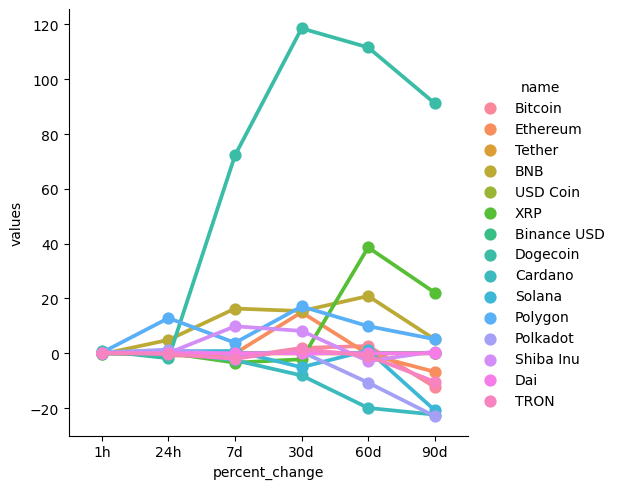

In [17]:
# Visualize dataframe

sns.catplot(x='percent_change',
            y='values',
            hue= 'name',
            data=df7,
            kind='point')
plt.show()

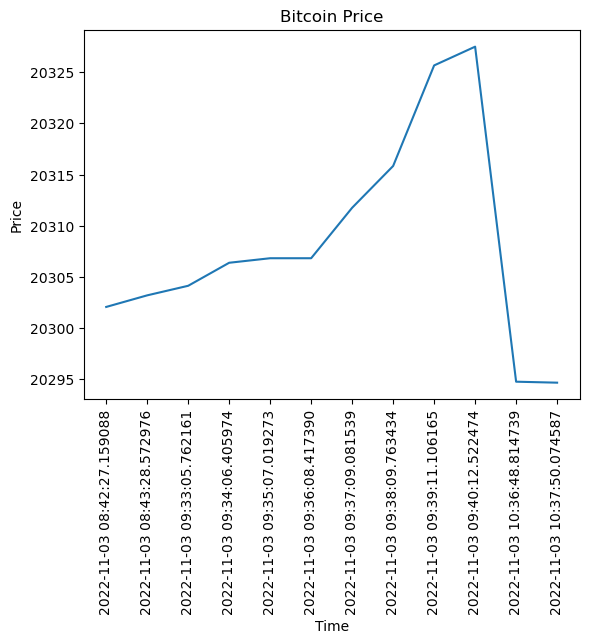

In [18]:
# Visualize data for Bitcoin only

df8 = df72[['name','quote.USD.price','timestamp']]
df_bit = df8.query("name=='Bitcoin'")


sns.lineplot(x='timestamp',
             y='quote.USD.price',
             data=df_bit,
            )
plt.title('Bitcoin Price')
plt.ylabel('Price')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.show()